##NETFLIX BUSINESS CASE STUDY 

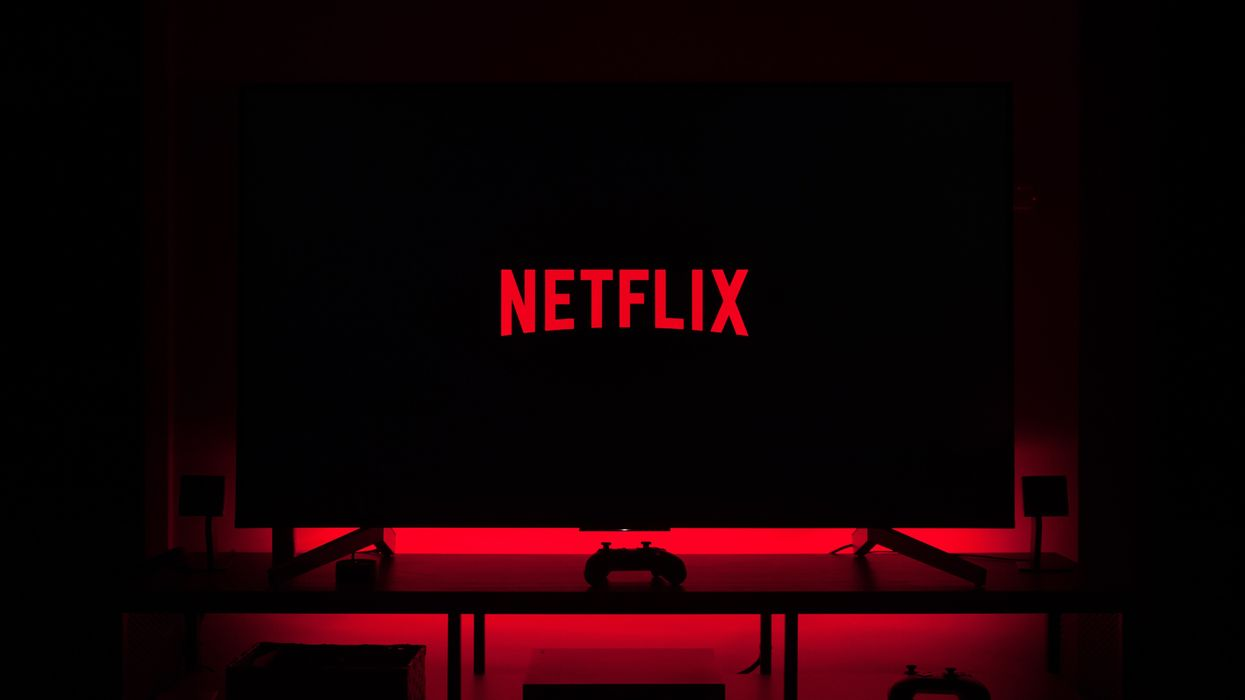

**Problem statment** :

> Generate insights which can help Netflix decide which type of Shows/Movies to produce & how to grow the business




Importing libraries required for analysis

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Printing the dataframe

In [ ]:
df = pd.read_csv('/content/netflix.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


This is how our data looks like

In [ ]:
df.shape

(8809, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**The column descriptions are as follows**

**Show_id**: Unique ID for every Movie / Tv Show

**Type**: Identifier - A Movie or TV Show

**Title**: Title of the Movie / Tv Show

**Director**: Director of the Movie

**Cast**: Actors involved in the movie/show

**Country**: Country where the movie/show was produced

**Date_added**: Date it was added on Netflix

**Release_year**: Actual Release year of the movie/show

**Rating**: TV Rating of the movie/show

**Duration**: Total Duration - in minutes or number of seasons

**Listed_in**: Genre

**Description**: The summary description

In the Netflix dataset we have 8809 rows and 12 columns to deduce information from, so let's engineer the data.

In [ ]:
df.describe()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8809,8808,8807,6173,7983,7976,8797,8807,8803,8804,8806,8806
unique,8809,3,8804,4528,7693,749,1768,75,18,221,514,8774
top,s1,Movie,15-Aug,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",2018,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,19,19,2817,109,1147,3207,1793,362,4


From the above descriptive statistics we get a general summary of the data.
Some of the inferences are:


*   **"Title"** according to this dataset is the key identifier and it only makes sense to not have repeating Titles.
*   **"Description"** is also another such column in this dataset which makes sense not to have repeating elements.

We should further analyse why these two columns have repeating elements in it.




In [ ]:
df[df['description'] == df['description'].value_counts().reset_index()['index'][0]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
236,s237,Movie,Boomika,Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",NaN,"August 23, 2021",2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
237,s238,Movie,Boomika (Hindi),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",NaN,"August 23, 2021",2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
238,s239,Movie,Boomika (Malayalam),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",NaN,"August 23, 2021",2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
239,s240,Movie,Boomika (Telugu),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",NaN,"August 23, 2021",2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."


**Observation** : The reason for having non unique descriptions is because, the description tends to remain the same for movies which have been released in multiple langauges.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8808 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7983 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   object
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8806 non-null   object
 11  description   8806 non-null   object
dtypes: object(12)
memory usage: 826.0+ KB


**Missing Values**


*   
Almost all columns except for "show_id" has missing values.
*   The columns "director" and "country" have by far the most number of missing values which is about 30% and 10% respectively







All the columns are of type object and we need to convert the column "release_year" to numerical data type of  type "int".

#Data Cleaning

In [ ]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    



*   By observing the unique values in the column "duration" we can see an anamoly wherein it accidently features a description instead of the duration.
*   We shall futher find this row in the dataframe to see it more clearly



In [ ]:
df[df['duration'] == 'This documentary centers on the crew of the B-17 Flying Fortress Memphis Belle as it prepares to execute a strategic bombing mission over Germany.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8421,"Flying Fortress""",William Wyler,NaN,United States,"March 31, 2017",1944,TV-PG,40 min,"Classic Movies, Documentaries",This documentary centers on the crew of the B-...,NaN,NaN


We can see that this particular row has "show_id" and "type" missing which has caused the entire data to be offset by 2 columns. We need to correct this offset so as to make the data more precise.






In [ ]:
df.loc[8421,:]

show_id                                          Flying Fortress"
type                                                William Wyler
title                                                         NaN
director                                            United States
cast                                               March 31, 2017
country                                                      1944
date_added                                                  TV-PG
release_year                                               40 min
rating                              Classic Movies, Documentaries
duration        This documentary centers on the crew of the B-...
listed_in                                                     NaN
description                                                   NaN
Name: 8421, dtype: object

In [ ]:
df.loc[8420,:]

show_id                                   s8420
type                                      Movie
title           The Memphis Belle: A Story of a
director                                    NaN
cast                                        NaN
country                                     NaN
date_added                                  NaN
release_year                                NaN
rating                                      NaN
duration                                    NaN
listed_in                                   NaN
description                                 NaN
Name: 8420, dtype: object

From the above data we see that the movie "The Memphis Belle: A Story of a Flying Fortress" has been split into two rows due to data mismatch. We need to delete the row 8421 and add the data in the row 8421 to 8420 in an appropriate manner.

In [ ]:
temp_list = list(df.loc[8421,:])[:-2]
temp_list.remove(temp_list[0])

In [ ]:
temp_list.insert(0,'The Memphis Belle: A Story of a Flying Fortress')
temp_list.insert(0,'Movie')
temp_list.insert(0,"s8420")

In [ ]:
df.loc[8420,:] = temp_list

In [ ]:
df.drop(labels=[8421],inplace=True)

In [ ]:
df = df.reset_index().drop(columns=['index'])

We successfully merged the two incomplete rows and made it into a single row and reset the index. We also deleted one row

In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

Now in "rating" column, we find anamolies which are '74 min', '84 min', '66 min'. These strings belong to the column "duration" and we shall append it to the same

In [ ]:
df[df['rating'] == '74 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [ ]:
df[df['rating'] == '84 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [ ]:
df[df['rating'] == '66 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Surprisingly all the rows which had rating as an anamoly are the sequels of "Louis C.K." which is a standup comedy show.

In [ ]:
df.loc[5813,['duration']] = '66 min'
df.loc[5794,['duration']] = '84 min'
df.loc[5541,['duration']] = '74 min'

We changed the "duration" columns of of rows 5541,5794 & 5813 appropriately. Now we need to change the "rating" column of these rows to "NR" which means "NOT RATED"

In [ ]:
df.loc[5813,['rating']] = "NR"
df.loc[5794,['rating']] = "NR"
df.loc[5541,['rating']] = "NR"

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.nunique()

show_id         8808
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            14
duration         220
listed_in        514
description     8775
dtype: int64

This table gives us information about number of unique values in each dataset.

# Treating Missing Values

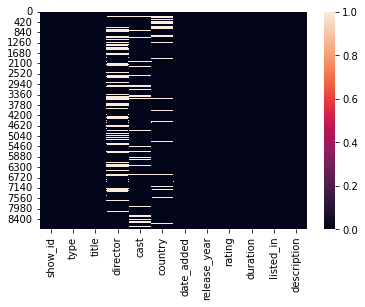

In [ ]:
sns.heatmap(df.isnull())

This heatmap helps us visualise the places where the missing data occurs in the datset.

Let us have a look at the number of misisng values in each column.

In [ ]:
(df.isnull().sum()/len(df))*100

show_id          0.000000
type             0.011353
title            0.011353
director        29.915985
cast             9.377838
country          9.445958
date_added       0.124886
release_year     0.011353
rating           0.056767
duration         0.011353
listed_in        0.011353
description      0.011353
dtype: float64

The above column shows the percentage missing values in each column.

In [ ]:
  df[df['title'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8202,"and probably will.""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above row 8202 seems to be incomplete since it does not have values for any column other than title. The "title" also looks incomplete and hence it would be wise to delete the entire row altogether

In [ ]:
df.drop(labels=[8202],inplace=True)

In [ ]:
df = df.reset_index().drop(columns=['index'])

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

We shall impute the missing values of the "rating" column with NR which translates to Not Rated. Although ambiguity might arise we can afford to do it since NR and NaN both tend to render same inference

In [ ]:
df['rating'].fillna("NR",inplace = True)

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

We treated all the missing values apart from the columns "director","cast","country". It does not make sense to impute the missing values in the above columns since these are categorical variables with a large number of unique values and will cause bias to any analysis done thereon. 

To have uniformity in data we are now processing the data.

In [ ]:
df['listed_in'] =  df['listed_in'].apply(lambda x : x.split(","))

In [ ]:
for i in df['listed_in']:
  for j in range(len(i)):
    i[j] = i[j].strip()

In [ ]:
df['country'] =  df['country'].apply(lambda x : str(x).split(","))

In [ ]:
for i in df['country']:
  for j in range(len(i)):
    x = i[j].strip()
    i[j] = x.lower()

In [ ]:
df['director'] = df['director'].apply(lambda x : str(x).strip().lower())

Like mentioned before, we aim to keep the data uniform. One way to do that was to remove spaces in the string and also converting them to lower case letters to ensure that there is no duplicacy.

# Analysis

**Finding the ratio of Movies to TV shows on Netflix.**

In [ ]:
df_split = round(round(df.groupby('type').count())['show_id']/len(df)*100)
df_split

type
Movie      70.0
TV Show    30.0
Name: show_id, dtype: float64

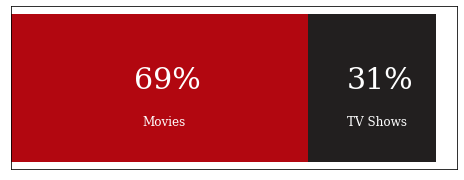

In [ ]:
fig_split = plt.figure(figsize=(8,3))
ax_split = fig_split.add_subplot(111)
ax_split.barh("Movie",df_split['Movie'],color='#b20710')
ax_split.barh("Movie",df_split['TV Show'],left=df_split['Movie'],color='#221f1f')
ax_split.set_xticks([])
ax_split.set_yticks([])
ax_split.annotate("69%",xy=(29,0),fontsize=30,color='White',fontfamily='serif')
ax_split.annotate("Movies",xy=(31,-0.2),fontsize=12,color='White',fontfamily='serif')
ax_split.annotate("31%",xy=(79,0),fontsize=30,color='White',fontfamily='serif')
ax_split.annotate("TV Shows",xy=(79,-0.2),fontsize=12,color='White',fontfamily='serif')
plt.show()

We can see from the above graph that Movies constitute to about 69% of Netflix content and the remaining 31% content makes up TV Shows

In [ ]:
df_movie = df[df['type'] == 'Movie'].reset_index().drop(columns=['index'])

Created a seperate dataframe which encompasses just movies.

In [ ]:
df_movie['duration'] = df_movie['duration'].apply(lambda x : float(x.split(" min")[0]))

In [ ]:
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,kirsten johnson,NaN,[united states],"September 25, 2021",2020,PG-13,90.0,[Documentaries],"As her father nears the end of his life, filmm..."
1,s7,Movie,My Little Pony: A New Generation,"robert cullen, josã© luis ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",[nan],"September 24, 2021",2021,PG,91.0,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
2,s8,Movie,Sankofa,haile gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","[united states, ghana, burkina faso, united ki...","September 24, 2021",1993,TV-MA,125.0,"[Dramas, Independent Movies, International Mov...","On a photo shoot in Ghana, an American model s..."
3,s10,Movie,The Starling,theodore melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",[united states],"September 24, 2021",2021,PG-13,104.0,"[Comedies, Dramas]",A woman adjusting to life after a loss contend...
4,s13,Movie,Je Suis Karl,christian schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","[germany, czech republic]","September 23, 2021",2021,TV-MA,127.0,"[Dramas, International Movies]",After most of her family is murdered in a terr...


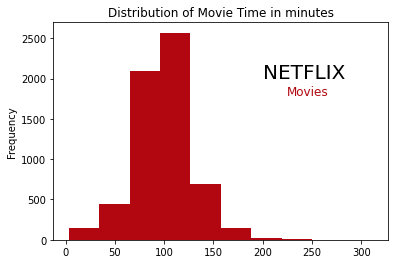

In [ ]:
df_movie['duration'].plot(kind='hist',color='#b20710',title = "Distribution of Movie Time in minutes")
plt.annotate("NETFLIX",xy=(200,2000),fontsize=20)
plt.annotate("Movies",xy=(225,1800),fontsize=12,color='#b20710')
plt.show()

From the above distribution we can see that the average movie time is around 100 mins and majority of the movies have run time between 75-120mins.

**Number of movies released per year over the last 30 years**

In [ ]:
df_movie['release_year'] = df_movie['release_year'].apply(lambda x : int(x))

In [ ]:
df_mov_year = df_movie.groupby('release_year').count()['show_id'].to_frame().reset_index()
df_mov_year

,release_year,show_id
0,1942,2
1,1943,3
2,1944,3
3,1945,3
4,1946,1
...,...,...
68,2017,767
69,2018,767
70,2019,633
71,2020,517


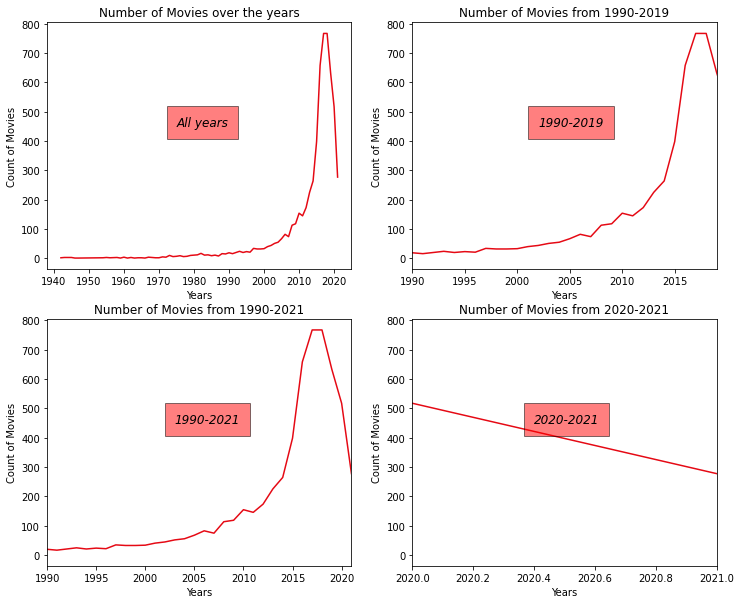

In [ ]:
fig_movies = plt.figure(figsize=(12,10))
ax_mov = fig_movies.add_subplot(221)
ax_mov.plot( df_mov_year['release_year'], df_mov_year['show_id'],color="#e50914")
ax_mov.set_xlabel("Years")
ax_mov.set_ylabel("Count of Movies")
ax_mov.set_title("Number of Movies over the years")
ax_mov.annotate("All years",xy = (1975,450),fontsize=12,
                color='black',style= 'italic',
                bbox=
                {'facecolor': 'Red', 'alpha': 0.5, 'pad': 10})

ax_mov1 = fig_movies.add_subplot(222)
ax_mov1.plot( df_mov_year['release_year'], df_mov_year['show_id'],color="#e50914")
ax_mov1.set_xlabel("Years")
ax_mov1.set_ylabel("Count of Movies")
ax_mov1.set_title("Number of Movies from 1990-2019")
ax_mov1.set_xlim(1990,2019)
ax_mov1.annotate("1990-2019",xy = (2002,450),fontsize=12,
                color='Black',style= 'italic',
                bbox=
                {'facecolor': 'Red', 'alpha': 0.5, 'pad': 10})

ax_mov2 = fig_movies.add_subplot(223)
ax_mov2.plot( df_mov_year['release_year'], df_mov_year['show_id'],color="#e50914")
ax_mov2.set_xlabel("Years")
ax_mov2.set_ylabel("Count of Movies")
ax_mov2.set_title("Number of Movies from 1990-2021")
ax_mov2.set_xlim(1990,2021)
ax_mov2.annotate("1990-2021",xy = (2003,450),fontsize=12,
                color='Black',style= 'italic',
                bbox=
                {'facecolor': 'Red', 'alpha': 0.5, 'pad': 10})

ax_mov3 = fig_movies.add_subplot(224)
ax_mov3.plot( df_mov_year['release_year'], df_mov_year['show_id'],color="#e50914")
ax_mov3.set_xlabel("Years")
ax_mov3.set_ylabel("Count of Movies")
ax_mov3.set_title("Number of Movies from 2020-2021")
ax_mov3.set_xlim(2020,2021)
ax_mov3.annotate("2020-2021",xy = (2020.4,450),fontsize=12,
                color='Black',style= 'italic',
                bbox=
                {'facecolor': 'Red', 'alpha': 0.5, 'pad': 10})
plt.show()

**Observation**



*   We can certainly see a huge reduction of movies released in the recent couple of years. This is attributed to the ongoing pandemic which has affected all our lives.
*   The surprising observation is that the number of movies released reduced even in the year 2019 which was pre-pandemic.











**The top 10 countries that have produced most content in Netflix**

In [ ]:
for i in df['listed_in']:
  for j in range(len(i)):
    i[j] = i[j].strip().lower()

In [ ]:
all_countries = []
for i in df['country']:
  for j in range(len(i)):
    all_countries.append(i[j])

In [ ]:
df_top10_countries = pd.Series(all_countries).value_counts()[:11].to_frame().drop(labels=['nan'])
df_top10_countries

,0
united states,3690
india,1046
united kingdom,806
canada,445
france,393
japan,318
spain,232
south korea,231
germany,226
mexico,169


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

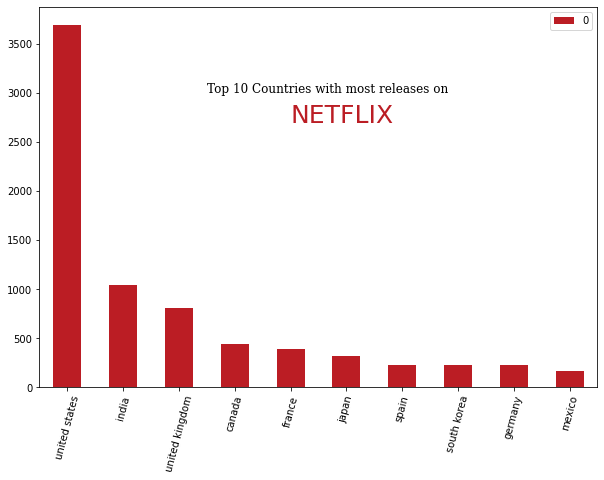

In [ ]:
df_top10_countries.plot(kind='bar',color = "#bb1d24",figsize=(10,7))
plt.annotate("Top 10 Countries with most releases on",xy=(2.5,3000),fontsize=12,
             color='black',fontfamily='serif')
plt.annotate("NETFLIX",xy=(4,2700),fontsize=25,
             color='#bb1d24',fontfamily='DejaVu Sans')
plt.xticks(rotation=75,color="black")

These are the top 10 countries which have the most number of movies/shows produced.

The number of content produced in USA is almost 3 times the sum of India which is the second largest content producer for Netflix.

**Top 10 countries and their genres**

In [ ]:
df_explode1 = df.explode("country").explode('listed_in')

In [ ]:
temp_countries = list(set(list(df_explode1['country'].unique())) - set(list(df_top10_countries.index.values)))

In [ ]:
tdf1 = df_explode1.set_index('country').drop(labels=temp_countries).reset_index()
tdf1

,country,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
0,united states,s1,Movie,Dick Johnson Is Dead,kirsten johnson,NaN,"September 25, 2021",2020,PG-13,90 min,documentaries,"As her father nears the end of his life, filmm..."
1,india,s5,TV Show,Kota Factory,nan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","September 24, 2021",2021,TV-MA,2 Seasons,international tv shows,In a city of coaching centers known to train I...
2,india,s5,TV Show,Kota Factory,nan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","September 24, 2021",2021,TV-MA,2 Seasons,romantic tv shows,In a city of coaching centers known to train I...
3,india,s5,TV Show,Kota Factory,nan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","September 24, 2021",2021,TV-MA,2 Seasons,tv comedies,In a city of coaching centers known to train I...
4,united states,s8,Movie,Sankofa,haile gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","September 24, 2021",1993,TV-MA,125 min,dramas,"On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
16031,united states,s8806,Movie,Zoom,peter hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","January 11, 2020",2006,PG,88 min,children & family movies,"Dragged from civilian life, a former superhero..."
16032,united states,s8806,Movie,Zoom,peter hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","January 11, 2020",2006,PG,88 min,comedies,"Dragged from civilian life, a former superhero..."
16033,india,s8807,Movie,Zubaan,mozez singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...","March 2, 2019",2015,TV-14,111 min,dramas,A scrappy but poor boy worms his way into a ty...
16034,india,s8807,Movie,Zubaan,mozez singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...","March 2, 2019",2015,TV-14,111 min,international movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
countries_movietypes = pd.crosstab(tdf1['listed_in'],tdf1['country'])

In [ ]:
display(countries_movietypes)

country,canada,france,germany,india,japan,mexico,south korea,spain,united kingdom,united states
listed_in,,,,,,,,,,
action & adventure,44,37,33,137,57,9,17,10,84,404
anime features,0,0,0,0,61,0,0,0,0,7
anime series,2,0,0,0,143,0,0,1,0,18
british tv shows,3,2,6,3,1,0,0,5,225,24
children & family movies,80,23,17,26,19,5,10,9,46,390
classic & cult tv,4,0,0,0,0,2,0,0,7,17
classic movies,0,6,0,11,3,1,0,1,16,81
comedies,94,51,42,323,9,24,17,47,91,680
crime tv shows,15,23,15,9,16,32,24,27,48,145


The above table consolidates the number of movies in different genres in the top 10 countries which produce the most movies/shows

Some of the **inferences** are as follows:


*   **United States** has the most movies produced almost across all genres except a few
*   **Japan** has the most number of anime centric shows


*   **South Korea** has the most number of Romantc Tv shows


**Recommendation to Netflix**:


1.   South Koreans enjoy Romantic TV shows, so it would only make sense for netflix to add more romantic shows
2.   Japanese people has a very strong affection to animes, hence Netflix should produce more animes in Japan




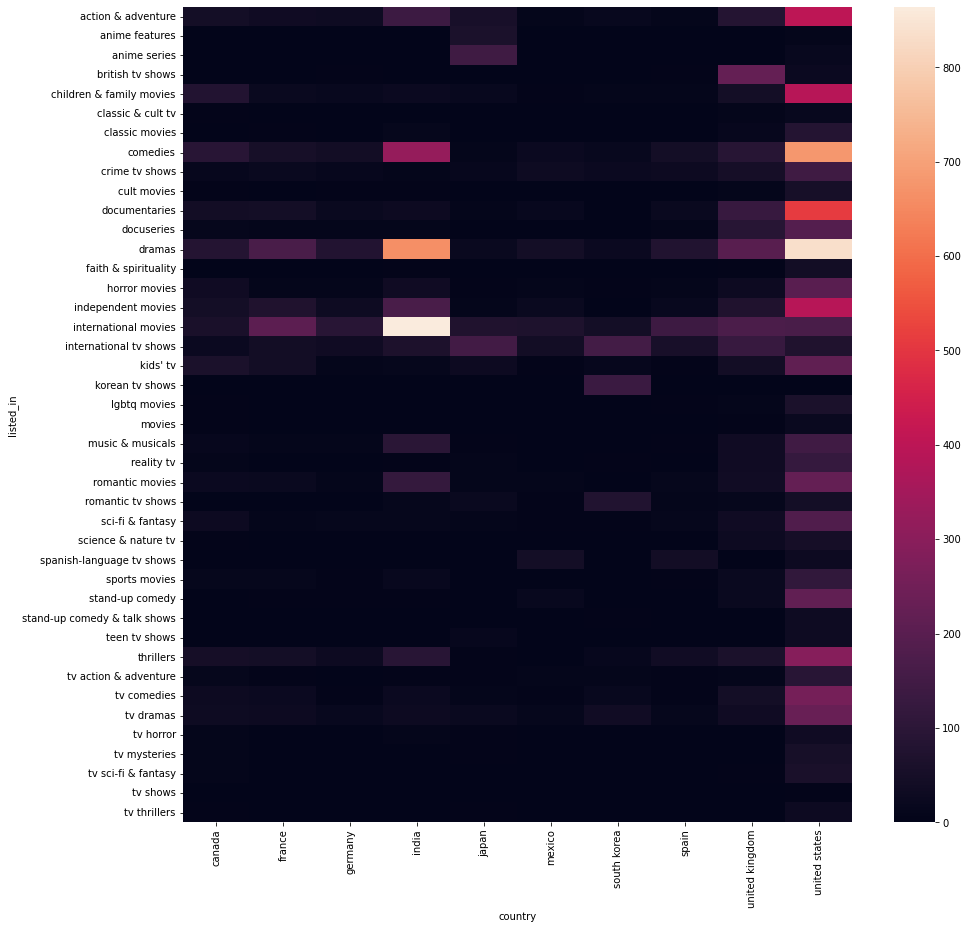

In [ ]:
fig_1, ax_1 = plt.subplots(figsize=(15,15)) 
sns.heatmap(countries_movietypes)

The heatmap above shows the relationship between the type of movies/shows across the top 10 countries.

**Observations**: 


*   United State's favourite kind of genre is "Drama"
*   India's favourite type of genre is "Drama" as well since "International Movies" is not really a genre.



In [ ]:
tdf1[(tdf1['country']== 'south korea') & (tdf1['listed_in']== 'romantic tv shows') ]['director'].value_counts()[1:]

shin won-ho      2
park joon-hwa    1
lee yoon-jung    1
lee eung-bok     1
Name: director, dtype: int64

In [ ]:
tdf1[(tdf1['country']== 'south korea') & (tdf1['listed_in']== 'korean tv shows') ]['director'].value_counts()[1:]

shin won-ho                                               2
jung-ah im                                                1
kim seong-hun                                             1
park joon-hwa                                             1
lee yoon-jung                                             1
lee kyoungmi, yim pilsung, jeon go-woon, kim jong-kwan    1
lee eung-bok                                              1
chang-min lee                                             1
jung-ah im, seung-uk jo                                   1
Name: director, dtype: int64

**Observation** : Shin won-ho appears to be a popular choice for both romantic tv shows and Korean Tv shows

**Recommendation to Netflix** : Approach Shin won-ho to create a romantic genre TV show for Netflix Originals.

**Comparission of Tv shows and Movies**

In [ ]:
df_tvshow = df[df['type'] == 'TV Show'].reset_index().drop(columns=['index'])
df_tvshow.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,TV Show,Blood & Water,nan,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[south africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[international tv shows, tv dramas, tv mysteries]","After crossing paths at a party, a Cape Town t..."
1,s3,TV Show,Ganglands,julien leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",[nan],"September 24, 2021",2021,TV-MA,1 Season,"[crime tv shows, international tv shows, tv ac...",To protect his family from a powerful drug lor...
2,s4,TV Show,Jailbirds New Orleans,nan,NaN,[nan],"September 24, 2021",2021,TV-MA,1 Season,"[docuseries, reality tv]","Feuds, flirtations and toilet talk go down amo..."
3,s5,TV Show,Kota Factory,nan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",[india],"September 24, 2021",2021,TV-MA,2 Seasons,"[international tv shows, romantic tv shows, tv...",In a city of coaching centers known to train I...
4,s6,TV Show,Midnight Mass,mike flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",[nan],"September 24, 2021",2021,TV-MA,1 Season,"[tv dramas, tv horror, tv mysteries]",The arrival of a charismatic young priest brin...


In [ ]:
df_tvshow['duration_time'] =  df_tvshow['duration'].apply(lambda x : int(x.split(" ")[0]))

In [ ]:
df_movie_genre10 = df_movie.explode('listed_in')['listed_in'].value_counts()[:10].reset_index()

In [ ]:
df_tvshow10_genre = df_tvshow.explode('listed_in')['listed_in'].value_counts()[:10].reset_index()

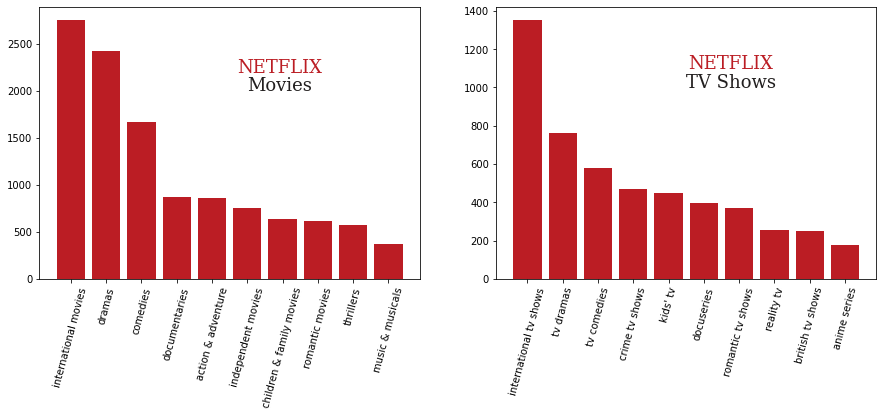

In [ ]:
fig_new = plt.figure(figsize=(15,5))
ax_new = fig_new.add_subplot(121)
ax_new.bar(df_movie_genre10['index'],df_movie_genre10['listed_in'],color="#bb1d24")
ax_new1 = fig_new.add_subplot(122)
ax_new1.bar(df_tvshow10_genre['index'],df_tvshow10_genre['listed_in'],color="#bb1d24")
ax_new.set_xticklabels(list(df_movie_genre10['index']),rotation=75)
ax_new1.set_xticklabels(list(df_tvshow10_genre['index']),rotation=75)
ax_new.annotate("NETFLIX",xy=(4.7,2200),fontsize=18,color='#bb1d24',fontfamily='serif')
ax_new.annotate("Movies",xy=(5,2000),fontsize=18,color='#221f1f',fontfamily='serif')
ax_new1.annotate("NETFLIX",xy=(4.55,1100),fontsize=18,color='#bb1d24',fontfamily='serif')
ax_new1.annotate("TV Shows",xy=(4.5,1000),fontsize=18,color='#221f1f',fontfamily='serif')
plt.show()


In [ ]:
df_explode1[df_explode1['listed_in'] == "anime series"]['rating'].value_counts()

TV-14    75
TV-MA    66
TV-Y7    28
TV-PG    20
TV-Y      2
NR        1
Name: rating, dtype: int64

**Observation**: 

*   The first 3 categories are same in both Movies and Tv shows
*   The one standout in the above plots are "Anime". Although Anime movie genre did not make the cut in "Movies" it certainly did in "TV shows".

**Inference**:


*    People enjoy watching Anime as a series over movies. 

*   Although there is a pre set notion that Anime is usually for kids. We can see that the rating for "TV-MA" is almost around "TV-14" indicating that Anime is best enjoyed both by kids above 14 and mature adults.


**Recommendation to Netflix** : 


*   Produce or onboard more Anime Series of rating TV-14/TV_MA on Netflix.









**Rating Vs Release year**

In [ ]:
df_ct = pd.crosstab(df_movie['release_year'],df_movie['rating']).reset_index()

In [ ]:
df_ct

rating,release_year,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
0,1942,0,0,0,0,0,0,2,0,0,0,0,0,0,0
1,1943,0,0,0,0,0,0,0,0,0,3,0,0,0,0
2,1944,0,0,0,0,0,0,2,0,0,1,0,0,0,0
3,1945,0,0,0,0,0,0,2,0,1,0,0,0,0,0
4,1946,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2017,1,0,4,15,32,73,182,20,337,80,13,10,0,0
69,2018,2,1,1,31,30,52,176,18,358,71,13,13,1,0
70,2019,1,0,0,12,19,39,160,15,286,62,25,14,0,0
71,2020,1,0,0,15,21,48,91,26,220,46,34,15,0,0


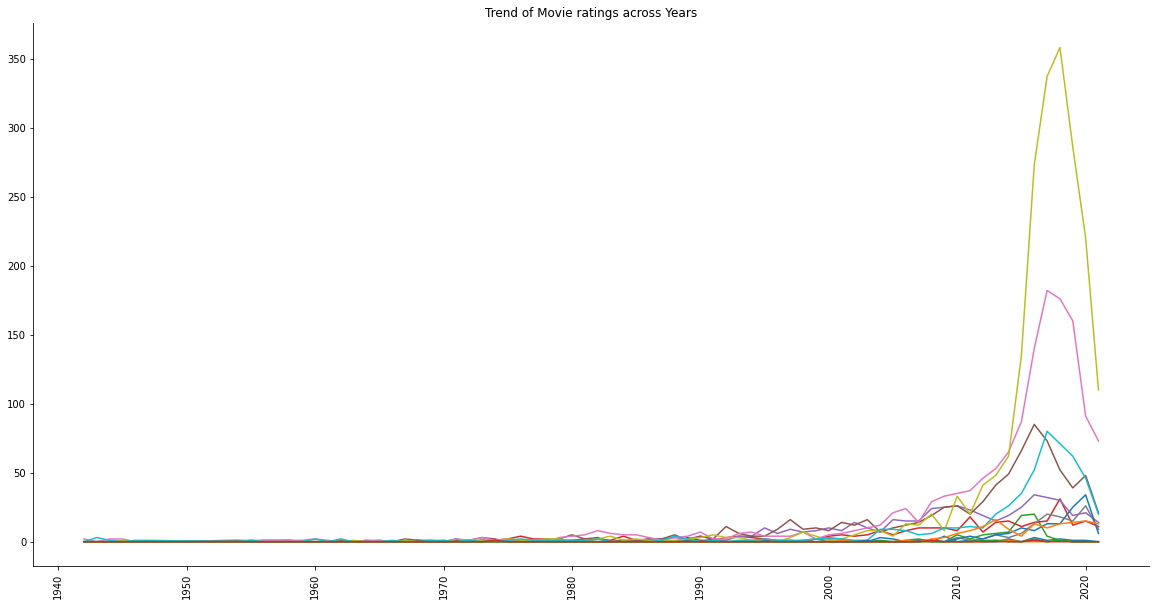

In [ ]:
fig_ct = plt.figure(figsize=(20,10))
ax_ct = fig_ct.add_subplot(111)
ax_ct.plot(df_ct['release_year'],df_ct['G'],label='G')
ax_ct.plot(df_ct['release_year'],df_ct['NC-17'],label='NC-17')
ax_ct.plot(df_ct['release_year'],df_ct['NR'],label='NR')
ax_ct.plot(df_ct['release_year'],df_ct['PG'],label='PG')
ax_ct.plot(df_ct['release_year'],df_ct['PG-13'],label='PG-13')
ax_ct.plot(df_ct['release_year'],df_ct['R'],label='R')
ax_ct.plot(df_ct['release_year'],df_ct['TV-14'],label='TV-14')
ax_ct.plot(df_ct['release_year'],df_ct['TV-G'],label='TV-G')
ax_ct.plot(df_ct['release_year'],df_ct['TV-MA'],label='TV-MA')
ax_ct.plot(df_ct['release_year'],df_ct['TV-PG'],label='TV-PG')
ax_ct.plot(df_ct['release_year'],df_ct['TV-Y'],label='TV-Y')
ax_ct.plot(df_ct['release_year'],df_ct['TV-Y7'],label='TV-Y7')
ax_ct.plot(df_ct['release_year'],df_ct['TV-Y7-FV'],label='TV-Y7-FV')
ax_ct.plot(df_ct['release_year'],df_ct['UR'],label='UR')
plt.xticks(rotation=90)
plt.title("Trend of Movie ratings across Years")
# plt.xlabel("Years")
# plt.ylabel("Count")
sns.despine()
plt.show()


**Observation** : From the mid 2000's to up until 2014, TV-14 had quite the popularity. However, after that there was a sudden surge in the amount of movies produced with "TV-MA" rating over powering "TV-14" to a great extent.

**Inference** : TV-MA is the current category which is trending since 2014.

**Recommendation to Netflix** : With the surge in demand for TV-MA rated movies, Netflix should align with the trend and push more TV-MA rated content.

**Duration of Movies over the years**

In [ ]:
order_year = list(pd.Series(df_movie['release_year'].unique()).sort_values())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


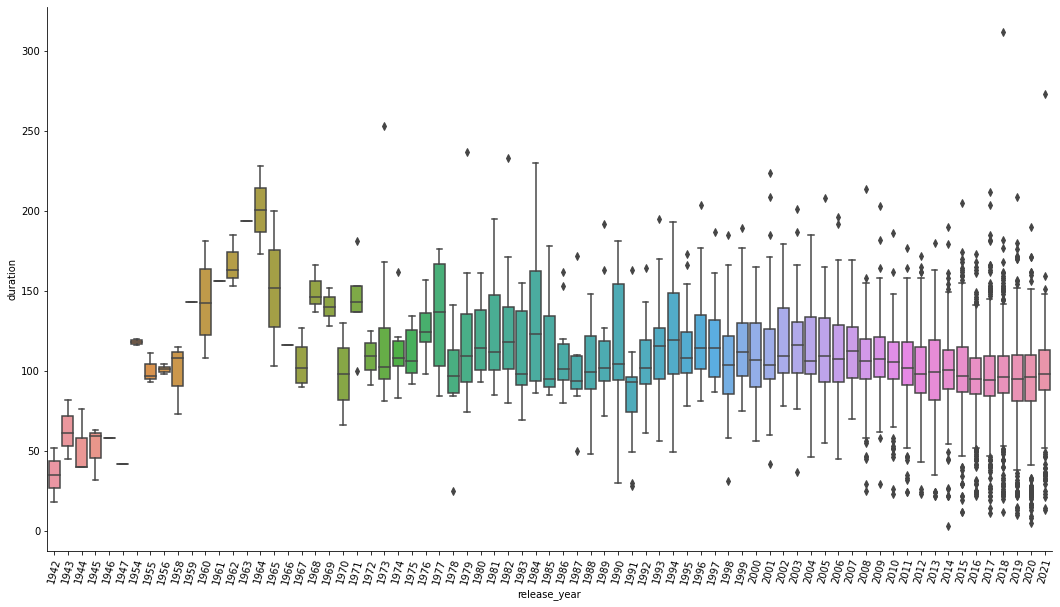

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.boxplot(df_movie['release_year'],df_movie['duration'],order=order_year)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
sns.despine()
plt.show()

The above boxplot helps us visualise the movie duration over the years.

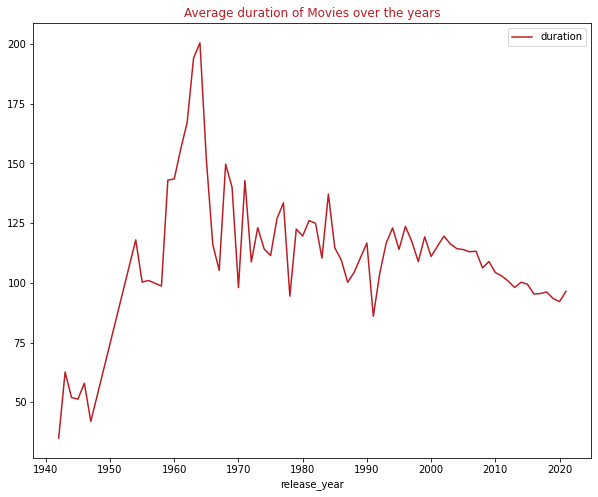

In [ ]:
df_movie.groupby('release_year').mean().plot(kind='line',color='#bb1d24',figsize=(10,8))
plt.title("Average duration of Movies over the years", color = "#bb1d24")
plt.show()

**Observation** :The above graph shows us the average duration of movies over the years. There has been a steady decline in the duration of movies since the mid 1990's

**Inference** : With the Human's attention span shrinking, it only makes sense not to have movies with elongated hours.

**Top directors in India**

In [ ]:
india_lst = []
for i in df['country']:
  flag = False
  for j in range(len(i)):
    if i[j] == "india":
      flag = True
      break
  if flag == False:
    india_lst.append(0)
  else:
    india_lst.append(1)


In [ ]:
df['india'] = india_lst

In [ ]:
df_india = df[df['india'] == 1].reset_index().drop(columns=['index'])

In [ ]:
df_india['director'].value_counts()

nan                                85
david dhawan                        9
ram gopal varma                     7
sooraj r. barjatya                  6
anees bazmee                        6
                                   ..
thiagarajan kumararaja              1
svati chakravarty bhatkal           1
abhijit kokate, srivinay salian     1
vinod kapri                         1
mozez singh                         1
Name: director, Length: 700, dtype: int64

In [ ]:
df_dhawan = df[df['director'] == 'david dhawan'].reset_index().drop(columns=['index'])

In [ ]:
dhawan_list_type = []
for i in df_dhawan['listed_in']:
  for j in range(len(i)):
    x = i[j].strip().lower()
    dhawan_list_type.append(x)


In [ ]:
pd.Series(dhawan_list_type).value_counts()

comedies                9
international movies    8
music & musicals        3
romantic movies         3
action & adventure      2
sci-fi & fantasy        1
dramas                  1
dtype: int64

**Inference** : One of the filmmaker who has had multiple movies listed in Netflix India is Mr.David Dhawan. 

**Suggestions** : Netflix can approach David Dhawan to create a comedy genre movie for it's original content **Netflix Originals** to lure in new subscribers

**Rating vs Release year in India**

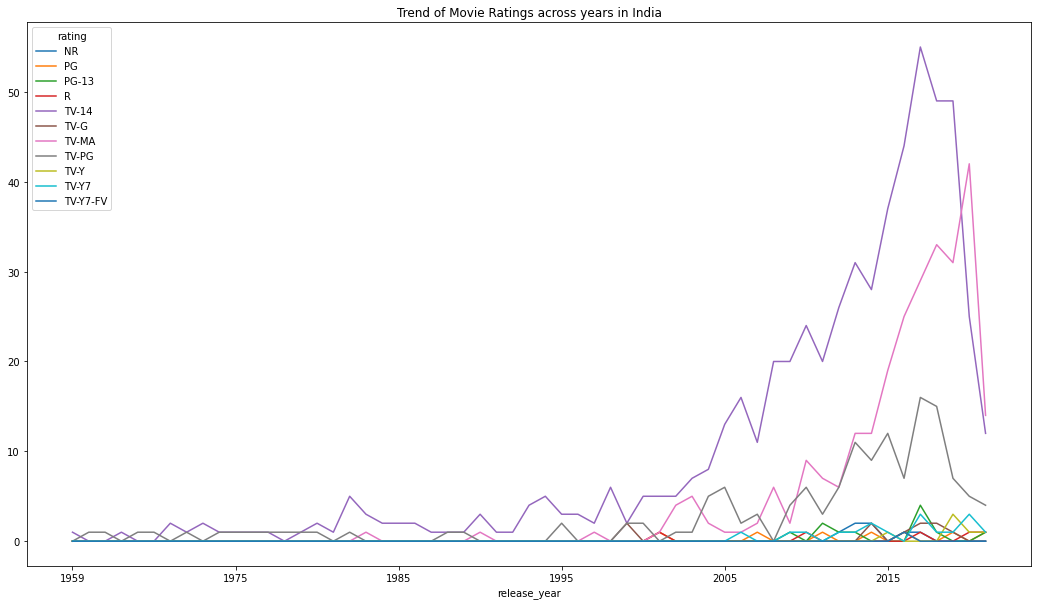

In [ ]:
pd.crosstab(df_india['release_year'],df_india['rating']).plot(figsize=(18,10),title="Trend of Movie Ratings across years in India")

**Inference** : India's choice for movies has always been "TV-14" (unsuitable for children under 14 years of age) rated since around 1980's. This choice does not come as a surprise since India being Familialistic nation would naturally want to watch movies as a Family which includes everyone from children to grandparents without any explicit content. 

However it is surprisng to see a sligt change in the Movie/TV show trends since the pandemic started. Of course there has been a significant overall reduction in the number of movies rolled out since the pandemic, but the decline in "TV-14" rated shows is more strong compared to the "TV-MA" rated shows. This has supposedly got to be associated with the behavioural change that has been inflicting upon us since lockdowns started. People have probably started to watch movies individually rather not as a Family or group which has led to a lesser decline in movies meant for mature adults.

**Suggestion** : Netflix should add more movies which are "TV-MA" and "TV-14" rated.

In [ ]:
india_show_types = []
for i in df_india['listed_in']:
  for j in range(len(i)):
    india_show_types.append(i[j].strip().lower())

In [ ]:
pd.Series(india_show_types).value_counts()

international movies            864
dramas                          662
comedies                        323
independent movies              167
action & adventure              137
romantic movies                 120
music & musicals                 96
thrillers                        92
international tv shows           66
horror movies                    35
tv dramas                        28
documentaries                    27
children & family movies         26
tv comedies                      26
sports movies                    17
romantic tv shows                12
kids' tv                         12
sci-fi & fantasy                 12
classic movies                   11
docuseries                        9
crime tv shows                    9
tv horror                         7
reality tv                        6
stand-up comedy                   6
cult movies                       5
tv action & adventure             5
faith & spirituality              4
british tv shows            

**Inference** : The top 4 genres of Indian Cinema are 

*   Dramas
*   Comedies
*   Action & Adventure
*   Romantic





In [ ]:
for i in df_india['listed_in']:
  for j in range(len(i)):
    i[j] = i[j].strip().lower()

**Top casts in India**

In [ ]:
df_india['cast'] = df_india['cast'].apply(lambda x : str(x).split(","))

In [ ]:
for i in df_india['cast']:
  for j in range(len(i)):
    i[j] = (i[j].strip().lower())

In [ ]:
india_cast = []
for i in df_india['cast']:
  for j in range(len(i)):
    india_cast.append(i[j])

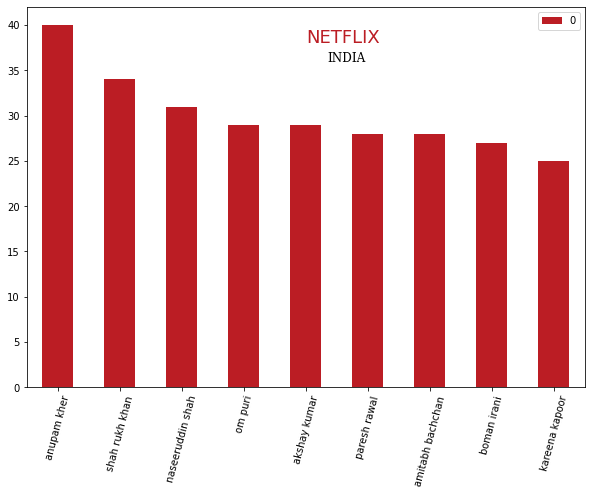

In [ ]:
pd.Series(india_cast).value_counts().to_frame()[:10].drop(labels = ['nan']).plot(kind='bar',color = "#bb1d24",figsize=(10,7))
plt.annotate("NETFLIX",xy=(4,38),fontsize=18,
             color='#bb1d24',fontfamily='DejaVu Sans')
plt.annotate("INDIA",xy=(4.35,36),fontsize=12,
             color='black',fontfamily='serif')
plt.xticks(rotation=75,color="black")
plt.show()

**Taking the last 10 years of data**

**Observation**: The top casts in India Netflix are as shown above. 

**Inference**: They are ubdoubtedly marquee actors who draws a large attention from the fans.

**Recommendation** : Netflix should produce an original content movie roping in multiple people from this list. With the huge fan following that these people have, it would surely translate to more subscribers joining Netflix to see their beloved actors newest releases.


Taking the last 10 years data of India
**bold text**






**Movies data**

In [ ]:
df_india_recent_mov = df_india[(df_india['release_year'] > '2011') & (df_india['type'] == 'Movie')].reset_index().drop(columns=['index'])

In [ ]:
india_cast_recent_mov = []
for i in df_india_recent_mov['cast']:
  for j in range(len(i)):
    india_cast_recent_mov.append(i[j])

Plotting the top 10 actors in recent Years

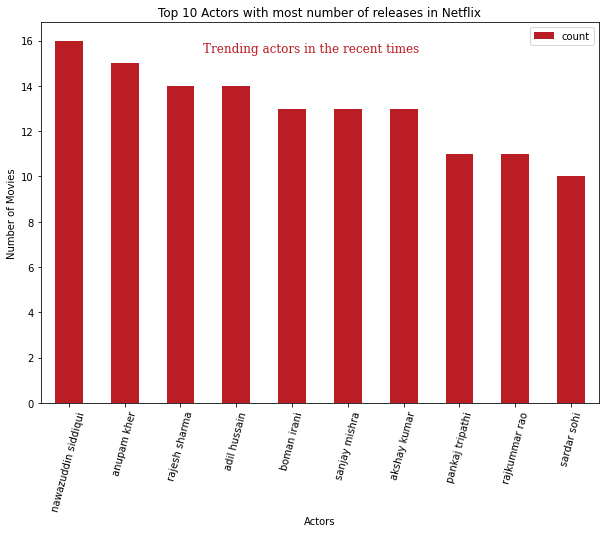

In [ ]:
pd.Series(india_cast_recent_mov).value_counts()[1:].to_frame()[:10].rename(columns = {0:"count"}).plot(kind='bar',figsize = (10,7),
                                                                                                       ylabel ='Number of Movies',
                                                                                                       xlabel = "Actors",
                                                                                                       title = "Top 10 Actors with most number of releases in Netflix",
                                                                                                       color = '#bb1d24',
                                                                                                       rot = 75)
plt.annotate("Trending actors in the recent times",xy=(2.4,15.5),fontsize=12,
             color='#bb1d24',fontfamily='serif')

plt.show()

**Observation** : Anupam Kher, Akshay Kumar & Boman Irani are some of the actors who are all time favourites

In [ ]:
india_cast_mov10 = pd.Series(india_cast_recent_mov).value_counts()[1:10].to_frame().reset_index().rename(columns = {0:'count','index':'actors'})

In [ ]:
india_cast_mov10list = list(india_cast_mov10['actors'])

In [ ]:
d = {}
for i in india_cast_mov10list:
  x = i.replace(" ","_")
  d[x] = []

In [ ]:
for actor in d.keys():
  for cast in df_india_recent_mov['cast']:
    flag = False
    for people in cast:
      if people == actor.replace("_"," "):
        flag = True
        break
    if flag == True:
      d[actor].append(1)
    else:
      d[actor].append(0)

In [ ]:
for i in d.keys():
  df_india_recent_mov[i] = d[i]

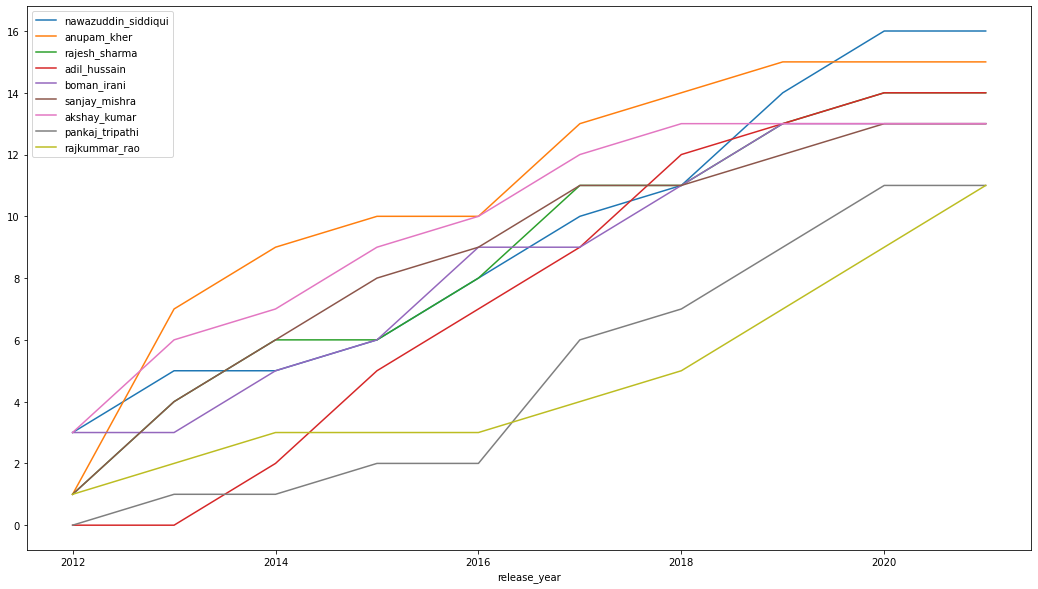

In [ ]:
df_india_recent_mov.groupby('release_year').sum().drop(columns = ['india']).cumsum().plot(figsize=(18,10))

**Observation** : The graph shows us the trend of actors over the last 10 years.


*   Nawazuddin Siddiqui is an actor who has been consistently trending since the last 10 years.
*   Rajkumar Rao is one such actor who has been in the limelight since the last couple of years.



**Genre trends in the recent years.**


In [ ]:
india_genre_recent_mov = []
for i in df_india_recent_mov['listed_in']:
  for j in range(len(i)):
    india_genre_recent_mov.append(i[j])

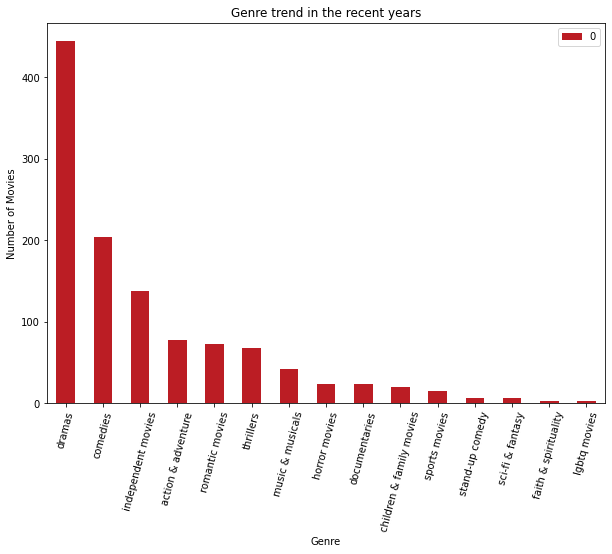

In [ ]:
pd.Series(india_genre_recent_mov).value_counts().to_frame().drop(labels=['international movies']).plot(kind='bar',figsize = (10,7),
                                                                                                       ylabel ='Number of Movies',
                                                                                                       xlabel = "Genre",
                                                                                                       title = "Genre trend in the recent years",
                                                                                                       color = '#bb1d24',
                                                                                                       rot = 75)
plt.show()

We have dropped "International Movies"  from the list because it does not denote the genre of the movie rather it signifies that the movie has been made outside of USA.

**Observation** : Dramas and comedies are India's most famous genres.

**Trend of genres over the years in India**

In [ ]:
india_genre_mov = pd.Series(india_genre_recent_mov).value_counts()[1:].to_frame().reset_index().rename(columns = {0:'count','index':'genre'})

In [ ]:
india_genre_movlist = list(india_genre_mov['genre'])

In [ ]:
d1 = {}
for i in india_genre_movlist:
  x = i.replace(" ","_")
  d1[x] = []

In [ ]:
for gen in d1.keys():
  for group in df_india_recent_mov['listed_in']:
    flag = False
    for types in group:
      if types == gen.replace("_"," "):
        flag = True
        break
    if flag == True:
      d1[gen].append(1)
    else:
      d1[gen].append(0)

In [ ]:
for i in d1.keys():
  df_india_recent_mov[i] = d1[i]

In [ ]:
list(d1.keys())

['dramas',
 'comedies',
 'independent_movies',
 'action_&_adventure',
 'romantic_movies',
 'thrillers',
 'music_&_musicals',
 'horror_movies',
 'documentaries',
 'children_&_family_movies',
 'sports_movies',
 'stand-up_comedy',
 'sci-fi_&_fantasy',
 'faith_&_spirituality',
 'lgbtq_movies']

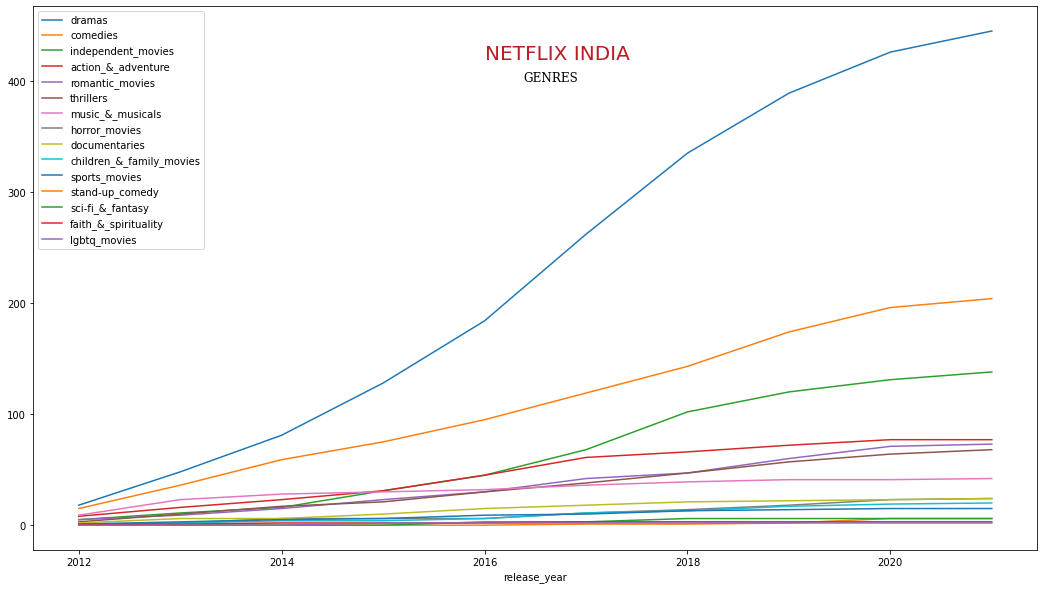

In [ ]:
df_india_recent_mov.groupby('release_year').sum().drop(columns= list(d.keys())).drop(columns = ['india']).cumsum().plot(figsize=(18,10))
plt.annotate("NETFLIX INDIA",xy=(4,420),fontsize=20,
             color='#bb1d24',fontfamily='DejaVu Sans')
plt.annotate("GENRES",xy=(4.38,400),fontsize=12,
             color='black',fontfamily='serif')
plt.show()

**Observation**: 

Dramas and Comedies in India have consistenly been outranking all the other genres. 


**Infernce** : Seeing the above trend in India, it is safe to say that the genres "Drama" and "Comedy" will continue to outperform in the near future as well.

**Recommendation to Netflix** : Netflix should concentrate more on listing Drama and Comedy genre movies for the likes of Indians.